In [1]:
# !git clone https://github.com/aras62/PIE.git
# !unzip /content/PIE/annotations/annotations.zip -d /content/PIE
# !unzip /content/PIE/annotations/annotations_vehicle.zip -d /content/PIE
# !mkdir /kaggle/working/PIE/content
# !git clone https://github.com/hustvl/YOLOP.git


In [2]:
!git clone https://github.com/ykotseruba/JAAD.git

Cloning into 'JAAD'...
remote: Enumerating objects: 6155, done.
remote: Counting objects: 100% (724/724), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 6155 (delta 672), reused 695 (delta 652), pack-reused 5431 (from 1)
Receiving objects: 100% (6155/6155), 42.16 MiB | 18.94 MiB/s, done.
Resolving deltas: 100% (5491/5491), done.


In [3]:
!pip install -q ultralytics opencv-python-headless 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.6 MB/s eta 0:00:00


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import xml.etree.ElementTree as ET
import os
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tqdm.notebook import tqdm
import random
import math
import zipfile
import cv2
from ultralytics import YOLO
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
# zip_path = "/kaggle/working/PIE/annotations/annotations.zip"
# extract_to = "/kaggle/working/PIE/annotations/"

# if os.path.exists(extract_to + 'annotations'):
#     print("Exists already. Not unzipping.")
# else:
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         zip_ref.extractall(extract_to)
#     print("Unzipped successfully.")

In [6]:
# zip_path = "/kaggle/working/PIE/annotations/annotations_vehicle.zip"
# extract_to = "/kaggle/working/PIE/annotations/"

# if os.path.exists(extract_to + 'annotations_vehicle'):
#     print("Exists already. Not unzipping.")
# else:
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         zip_ref.extractall(extract_to)
#     print("Unzipped successfully.")

In [7]:
# zip_path = "/kaggle/working/PIE/annotations/annotations_attributes.zip"
# extract_to = "/kaggle/working/PIE/annotations/"

# if os.path.exists(extract_to + "annotations_attributes"):
#     print("Exists already. Not unzipping.")
# else:
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         zip_ref.extractall(extract_to)
#     print("Unzipped successfully.")

Importing jaad_data for the first time...
✓ jaad_data imported.
--- Active streams for Model: ['bbox', 'ego_acc', 'ego_speed', 'ped_action', 'ped_look', 'static_context'] ---
Using device: cuda
--- JAAD DATASET INFERENCE (Hybrid: GT for some, Inferred Beh from Pose) ---
--- Processing specified videos: ['video_0006', 'video_0021', 'video_0040', 'video_0044', 'video_0072', 'video_0073', 'video_0082', 'video_0089', 'video_0099', 'video_0102', 'video_0123', 'video_0156', 'video_0160', 'video_0170', 'video_0172', 'video_0181', 'video_0193', 'video_0199', 'video_0217', 'video_0226', 'video_0252', 'video_0263', 'video_0273', 'video_0274', 'video_0291', 'video_0303', 'video_0306', 'video_0340', 'video_0343'] ---

Initializing JAAD object...
Created JAAD images dir: /kaggle/working/JAAD/images_extracted_custom_subset
Videos to be processed in this run: ['video_0006', 'video_0021', 'video_0040', 'video_0044', 'video_0072', 'video_0073', 'video_0082', 'video_0089', 'video_0099', 'video_0102', 'v

Videos(custom_val):   0%|          | 0/29 [00:00<?, ?it/s]

  custom_val generated 8157 sequences.
✓ JAAD val sequence list for custom subset saved. Found 8157 sequences.

Loading YOLOv8-pose model...


100%|██████████| 6.52M/6.52M [00:00<00:00, 20.6MB/s]


✓ YOLO loaded.

Creating JAAD Validation DataLoader for custom subset...
✓ JAAD Validation DataLoader ready (Val:8157).

Initializing model & loading pre-trained weights...
Init Model: ['bbox', 'ego_acc', 'ego_speed', 'ped_action', 'ped_look', 'static_context']
  – Str 'bbox'(in 4)
  – Str 'ego_acc'(in 2)
  – Str 'ego_speed'(in 1)
  – Str 'ped_action'(in 1)
  – Str 'ped_look'(in 1)
  – Str 'static_context'(in 23)
✓ Pre-trained loaded: /kaggle/input/mslstm-pid/pytorch/default/1/best_model_weighted_bbox_ego_acc_ego_speed_ped_action_ped_look_static_context_ep2.pth

---Starting Inference & Eval on JAAD custom subset (Hybrid)---


Model Inference on Val Set:   0%|          | 0/1020 [00:00<?, ?it/s]

Model inf pass complete. Processed 8157 samples in 1020 batches.

---Inf Time Breakdown(Val Set)---
Avg YOLO Pose/frame with ped:10.58ms(244710 total pose est.)
Avg Heuristic Beh Inf/sequence:0.007ms(8157 seqs processed)
Avg Main Model Fwd Pass/batch:10.84ms
Avg Main Model Fwd Pass/sample:1.36ms

DEBUG: Unique ground truth labels in validation set: (array([0, 1]), array([1969, 6188]))
DEBUG: final_val_probs_pos min: 5.763202182151872e-08, max: 0.04490255191922188, mean: 0.00556185282766819


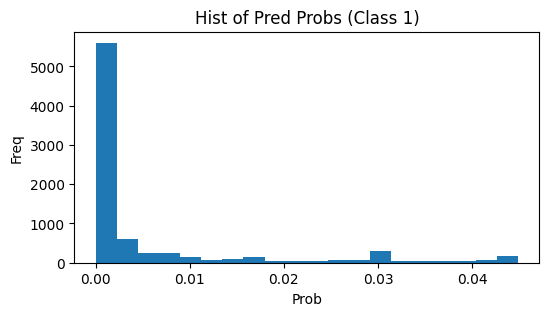

TuningThresh(F1):   0%|          | 0/101 [00:00<?, ?it/s]

--- DEBUG BEFORE ACCURACY SCORE ---
final_val_labels type:<class 'numpy.ndarray'>,len:8157
final_val_labels shape:(8157,)
final_val_preds_tuned type:<class 'numpy.ndarray'>,is None:False
final_val_preds_tuned shape:(8157,)
--- END DEBUG ---

---Final JAAD Metrics(Tuned Thresh,Inferred Beh)---
F1                       :0.8627

---Model Fusion Weights---
bbox           :0.1692
ego_acc        :0.1690
ego_speed      :0.1628
ped_action     :0.1657
ped_look       :0.1644
static_context :0.1689

---JAAD CUSTOM SUBSET INFERENCE & EVALUATION SCRIPT COMPLETE---

Cleaning up extracted images at /kaggle/working/JAAD/images_extracted_custom_subset...
✓ Image Cleanup successful.


In [8]:
import os
import sys
import time
import pickle
import gc
from pathlib import Path
import shutil
import random
import importlib

import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm
import pandas as pd
import torch.nn as nn
# import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from ultralytics import YOLO

# -----------------------------------------------------------------------------#
#                                JAAD utilities                                #
# -----------------------------------------------------------------------------#
MODIFIED_JAAD_DATA_PY_DIR = "/kaggle/input/jaad-data-py"
if MODIFIED_JAAD_DATA_PY_DIR not in sys.path:
    sys.path.insert(0, MODIFIED_JAAD_DATA_PY_DIR)

if 'jaad_data' in sys.modules:
    print("Attempting to reload jaad_data module...")
    try:
        jaad_data_module = sys.modules['jaad_data']
        importlib.reload(jaad_data_module)
        from jaad_data import JAAD
        print("✓ jaad_data reloaded.")
    except Exception as e:
        print(f"Could not reload jaad_data, attempting fresh import: {e}")
        from jaad_data import JAAD
        print("✓ jaad_data imported after path set.")
else:
    print("Importing jaad_data for the first time...")
    from jaad_data import JAAD
    print("✓ jaad_data imported.")

if JAAD is None:
    print(f"[ERROR] Could not import JAAD class from {MODIFIED_JAAD_DATA_PY_DIR}. Exiting.")
    sys.exit(1)

# -----------------------------------------------------------------------------#
#                              Configuration                                   #
# -----------------------------------------------------------------------------#
JAAD_DATASET_ROOT = "/kaggle/working/JAAD"
JAAD_CLIPS_PATH = "/kaggle/input/jaad-clips/JAAD_clips"
JAAD_IMAGES_PATH = os.path.join(JAAD_DATASET_ROOT, "images_extracted_custom_subset") # New name for clarity

# --- SPECIFY VIDEO IDs for Validation ---
# These videos will be used for image extraction (if needed) and sequence enumeration for validation.
# Ensure these video IDs exist in JAAD_CLIPS_PATH and have corresponding annotation XMLs.
VIDEOS_TO_PROCESS_FOR_VALIDATION = [
    'video_0006', 'video_0021', 'video_0040', 'video_0044', 'video_0072', 'video_0073',
    'video_0082', 'video_0089', 'video_0099', 'video_0102', 'video_0123', 'video_0156',
    'video_0160', 'video_0170', 'video_0172', 'video_0181', 'video_0193', 'video_0199',
    'video_0217', 'video_0226', 'video_0252', 'video_0263', 'video_0273', 'video_0274',
    'video_0291', 'video_0303', 'video_0306', 'video_0340', 'video_0343'
]# You can get video IDs from jaad_obj._get_video_ids_split('val', subset='default') to pick from actual val set
# Or pick any videos you want to test on.

FORCE_REEXTRACT_IMAGES_FOR_SPECIFIED_VIDEOS = False # If True, re-extracts images for the videos listed above
FORCE_REENUMERATE_VAL_SEQUENCES = True # Set to True to always regenerate val sequences for the specified videos

# Pickle file for validation sequences (name is generic, content depends on VIDEOS_TO_PROCESS_FOR_VALIDATION)
JAAD_VAL_SEQUENCES_PKL_PATH = f"/kaggle/working/jaad_val_seq_custom_subset.pkl"

PRETRAINED_MODEL_PATH = '/kaggle/input/mslstm-pid/pytorch/default/1/best_model_weighted_bbox_ego_acc_ego_speed_ped_action_ped_look_static_context_ep2.pth'

ACTIVE_STREAMS_JAAD_MODEL = ["bbox", "ego_acc", "ego_speed", "ped_action", "ped_look", "static_context"]
print(f"--- Active streams for Model: {ACTIVE_STREAMS_JAAD_MODEL} ---")

SEQ_LEN, PRED_LEN = 30, 1
INPUT_SIZE_BBOX_JAAD = 4
INPUT_SIZE_POSE_JAAD = 34
INPUT_SIZE_EGO_SPEED_JAAD = 1; INPUT_SIZE_EGO_ACC_JAAD = 2
INPUT_SIZE_PED_ACTION_JAAD = 1; INPUT_SIZE_PED_LOOK_JAAD = 1

NUM_SIGNALIZED_CATS_JAAD_PADDED = 4; NUM_INTERSECTION_CATS_JAAD_PADDED = 5
NUM_AGE_CATS_JAAD = 4; NUM_GENDER_CATS_JAAD = 3
NUM_TRAFFIC_DIR_CATS_JAAD = 2
LANE_CATEGORIES_JAAD = {1:0, 2:1, 3:2, 4:3, 5:4, 6:4, 7:4, 8:4, -1:1}
NUM_LANE_CATS_JAAD = 5
INPUT_SIZE_STATIC_JAAD_PADDED = (
    NUM_SIGNALIZED_CATS_JAAD_PADDED + NUM_INTERSECTION_CATS_JAAD_PADDED +
    NUM_AGE_CATS_JAAD + NUM_GENDER_CATS_JAAD + NUM_TRAFFIC_DIR_CATS_JAAD + NUM_LANE_CATS_JAAD
)
if INPUT_SIZE_STATIC_JAAD_PADDED != 23:
    print(f"[WARNING] JAAD Static context size is {INPUT_SIZE_STATIC_JAAD_PADDED}, PIE model might expect 23.")

BATCH_SIZE    = 8
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")
YOLO_POSE_MODEL_PATH = 'yolov8n-pose.pt'


def to_one_hot_jaad(index: int, num_classes: int) -> np.ndarray: # Unchanged
    vec = np.zeros(num_classes, dtype=np.float32); safe_index = int(np.clip(index, 0, num_classes - 1)); vec[safe_index] = 1.0; return vec
def infer_ped_action_from_pose_sequence(pose_sequence_np: np.ndarray): # Unchanged (heuristic)
    if pose_sequence_np.ndim == 2: num_kpts = pose_sequence_np.shape[1]//2;
    if num_kpts==0: return [0.0]*pose_sequence_np.shape[0]; pose_sequence_np=pose_sequence_np.reshape(-1,num_kpts,2)
    if pose_sequence_np.shape[1]!=17: return [0.0]*pose_sequence_np.shape[0]
    la,ra=15,16; acts=[]; thm=0.01
    for i in range(pose_sequence_np.shape[0]):
        if i==0:acts.append(0.0);continue
        lyp,lyc=pose_sequence_np[i-1,la,1],pose_sequence_np[i,la,1];ryp,ryc=pose_sequence_np[i-1,ra,1],pose_sequence_np[i,ra,1]
        lv,rv=lyp>1e-3 and lyc>1e-3,ryp>1e-3 and ryc>1e-3; mov,vm=0.0,0
        if lv:mov+=abs(lyc-lyp);vm+=1;
        if rv:mov+=abs(ryc-ryp);vm+=1
        avg_mov=(mov/vm) if vm>0 else 0.0; acts.append(1.0 if avg_mov>thm else 0.0)
    return acts
def infer_ped_look_from_pose_sequence(pose_sequence_np: np.ndarray): # Unchanged (heuristic)
    if pose_sequence_np.ndim==2:num_kpts=pose_sequence_np.shape[1]//2
    if num_kpts==0:return [0.0]*pose_sequence_np.shape[0];pose_sequence_np=pose_sequence_np.reshape(-1,num_kpts,2)
    if pose_sequence_np.shape[1]!=17:return [0.0]*pose_sequence_np.shape[0]
    ni=0;lks=[];ltl,lth=0.4,0.6
    for i in range(pose_sequence_np.shape[0]):nx=pose_sequence_np[i,ni,0];lks.append(1.0 if nx>1e-3 and ltl<nx<lth else 0.0)
    return lks

class JAADDataset_Cell2(Dataset): # Definition mostly unchanged, yolo_model is passed
    def __init__( self, jaad_db_obj: JAAD, jaad_sequences: list, seq_len: int, pred_len: int,
                 active_streams_for_model: list[str], yolo_pose_model, all_jaad_annotations ):
        self.jaad_obj=jaad_db_obj; self.sequences=jaad_sequences; self.seq_len=seq_len; self.pred_len=pred_len
        self.model_active_streams=active_streams_for_model; self.yolo_pose_model=yolo_pose_model
        self.total_yolo_pose_inference_time=0.0; self.num_yolo_pose_inferences=0
        self.total_heuristic_inference_time=0.0; self.num_heuristic_inferences=0
        self.jaad_full_db=all_jaad_annotations
        if not self.sequences: print(f"Warning: JAADDataset_Cell2 init with 0 sequences.")
    def _get_input_sizes_dict(self):
        s={"bbox":INPUT_SIZE_BBOX_JAAD,"ego_speed":INPUT_SIZE_EGO_SPEED_JAAD,"ego_acc":INPUT_SIZE_EGO_ACC_JAAD,
           "ped_action":INPUT_SIZE_PED_ACTION_JAAD,"ped_look":INPUT_SIZE_PED_LOOK_JAAD,"static_context":INPUT_SIZE_STATIC_JAAD_PADDED}
        if "pose" in self.model_active_streams:s["pose"]=INPUT_SIZE_POSE_JAAD # Not used by current model config
        return s
    def __len__(self): return len(self.sequences)
    def __getitem__(self, idx: int): # Logic for providing dummy/inferred action/look
        vid_id,ped_id,start_f,lbl=self.sequences[idx];vid_db=self.jaad_full_db.get(vid_id);ped_db=vid_db.get("ped_annotations",{}).get(ped_id)
        ped_attrs=ped_db.get("attributes",{});veh_annots=vid_db.get("vehicle_annotations",{})
        ped_fs=ped_db.get("frames",[]);
        try:sf_idx=ped_fs.index(start_f)
        except ValueError:raise ValueError(f"F{start_f} for {ped_id}/{vid_id} not in frames.")
        seq_f_nums=[ped_fs[sf_idx+i] for i in range(self.seq_len) if sf_idx+i < len(ped_fs)]
        if len(seq_f_nums)<self.seq_len:seq_f_nums.extend([seq_f_nums[-1]]*(self.seq_len-len(seq_f_nums)))
        st_v_p,st_v=False,np.zeros(INPUT_SIZE_STATIC_JAAD_PADDED,dtype=np.float32)
        fts={s:[] for s in ACTIVE_STREAMS_JAAD_MODEL};pose_4_heur=[]
        for f_num in seq_f_nums:
            try:fidx=ped_fs.index(f_num)
            except ValueError:fidx=-1
            if not st_v_p and "static_context" in ACTIVE_STREAMS_JAAD_MODEL:
                s,it=ped_attrs.get("signalized",0),ped_attrs.get("intersection",0);a,g=ped_attrs.get("age",2),ped_attrs.get("gender",0)
                td,nl=int(ped_attrs.get("traffic_direction",0)),ped_attrs.get("num_lanes",2);nlc=LANE_CATEGORIES_JAAD.get(nl,LANE_CATEGORIES_JAAD.get(2))
                st_v=np.concatenate([to_one_hot_jaad(s,NUM_SIGNALIZED_CATS_JAAD_PADDED),to_one_hot_jaad(it,NUM_INTERSECTION_CATS_JAAD_PADDED),
                                     to_one_hot_jaad(a,NUM_AGE_CATS_JAAD),to_one_hot_jaad(g,NUM_GENDER_CATS_JAAD),
                                     to_one_hot_jaad(td,NUM_TRAFFIC_DIR_CATS_JAAD),to_one_hot_jaad(nlc,NUM_LANE_CATS_JAAD)]).astype(np.float32);st_v_p=True
            bbox_d=ped_db["bbox"][fidx] if fidx!=-1 else [0,0,0,0]
            if "bbox" in ACTIVE_STREAMS_JAAD_MODEL:
                x1,y1,x2,y2=bbox_d;iw,ih=vid_db["width"],vid_db["height"]
                cx,cy,w,h=((x1+x2)/2)/iw if iw>0 else 0,((y1+y2)/2)/ih if ih>0 else 0,(x2-x1)/iw if iw>0 else 0,(y2-y1)/ih if ih>0 else 0
                fts["bbox"].append(np.array([cx,cy,w,h],dtype=np.float32))
            curr_f_p=np.zeros(INPUT_SIZE_POSE_JAAD,dtype=np.float32)
            if self.yolo_pose_model and fidx!=-1:
                img_p=self.jaad_obj._get_image_path(vid_id,f_num)
                if os.path.exists(img_p):
                    img=cv2.imread(img_p)
                    if img is not None:
                        x1r,y1r,x2r,y2r=bbox_d;x1,y1,x2,y2=int(x1r),int(y1r),int(x2r),int(y2r)
                        x1c,y1c=max(0,x1),max(0,y1);x2c,y2c=min(img.shape[1],x2),min(img.shape[0],y2)
                        if x1c<x2c and y1c<y2c:
                            crop=img[y1c:y2c,x1c:x2c]
                            if crop.size>0:
                                ts=time.time();res=self.yolo_pose_model(crop,verbose=False,device=DEVICE)
                                self.total_yolo_pose_inference_time+=(time.time()-ts);self.num_yolo_pose_inferences+=1
                                if res[0].keypoints and res[0].keypoints.data.numel()>0:
                                    kpts_n=res[0].keypoints.xyn[0].cpu().numpy()
                                    if kpts_n.size>0:flat_k=kpts_n.flatten();cl=len(flat_k)
                                    if cl<INPUT_SIZE_POSE_JAAD:curr_f_p[:cl]=flat_k
                                    else:curr_f_p=flat_k[:INPUT_SIZE_POSE_JAAD]
            pose_4_heur.append(curr_f_p)
            ego_a=veh_annots.get(f_num,0)
            if "ego_speed" in ACTIVE_STREAMS_JAAD_MODEL:fts["ego_speed"].append([float(ego_a)/4.0])
            if "ego_acc" in ACTIVE_STREAMS_JAAD_MODEL:fts["ego_acc"].append([0.,0.])
            if "static_context" in ACTIVE_STREAMS_JAAD_MODEL:fts["static_context"].append(st_v)
        pose_seq_np=np.array(pose_4_heur);ths=time.time()
        inf_acts=infer_ped_action_from_pose_sequence(pose_seq_np);inf_looks=infer_ped_look_from_pose_sequence(pose_seq_np)
        self.total_heuristic_inference_time+=(time.time()-ths);self.num_heuristic_inferences+=1
        if "ped_action" in ACTIVE_STREAMS_JAAD_MODEL:fts["ped_action"]=[[a] for a in inf_acts]
        if "ped_look" in ACTIVE_STREAMS_JAAD_MODEL:fts["ped_look"]=[[l] for l in inf_looks]
        final_fts={};
        for sn in ACTIVE_STREAMS_JAAD_MODEL:
            fa=np.asarray(fts[sn],dtype=np.float32);ed=self._get_input_sizes_dict().get(sn,1)
            if fa.ndim==1 and ed==1:fa=fa.reshape(-1,1)
            if fa.shape[0]<self.seq_len:pad_r=self.seq_len-fa.shape[0];pad_sh=(pad_r,)+fa.shape[1:] if fa.ndim>1 else (pad_r,ed);fa=np.vstack((fa,np.zeros(pad_sh,dtype=np.float32)))
            if fa.shape[0]!=self.seq_len or (fa.ndim>1 and fa.shape[1]!=ed):fa=np.zeros((self.seq_len,ed),dtype=np.float32)
            final_fts[sn]=torch.tensor(fa,dtype=torch.float32)
        return final_fts,torch.tensor(lbl,dtype=torch.long)

class Attention(nn.Module): # Unchanged
    def __init__(self, hidden_dim, attention_dim):super().__init__(); self.attention_net = nn.Sequential(nn.Linear(hidden_dim,attention_dim),nn.Tanh(),nn.Linear(attention_dim,1))
    def forward(self, lstm_output):att_scores=self.attention_net(lstm_output).squeeze(-1); att_weights=torch.softmax(att_scores,dim=1);ctx_vec=torch.sum(lstm_output*att_weights.unsqueeze(-1),dim=1); return ctx_vec,att_weights
class MultiStreamWeightedAvgLSTM(nn.Module): # Unchanged
    def __init__(self,input_sizes,lstm_hidden_size,num_lstm_layers,num_classes,attention_dim,dropout_rate,stream_names=None):
        super().__init__(); assert stream_names,"s_names empty."; self.stream_names=stream_names; self.num_active_streams=len(stream_names)
        self.lstm_output_dim=lstm_hidden_size*2; self.lstms,self.attentions=nn.ModuleDict(),nn.ModuleDict(); print(f"Init Model: {self.stream_names}")
        for name in self.stream_names:
            assert name in input_sizes,f"Input size for {name} missing.";in_s=input_sizes[name];print(f"  – Str '{name}'(in {in_s})")
            self.lstms[name]=nn.LSTM(in_s,lstm_hidden_size,num_lstm_layers,batch_first=True,dropout=dropout_rate if num_lstm_layers>1 else 0,bidirectional=True)
            self.attentions[name]=Attention(self.lstm_output_dim,attention_dim)
        self.fusion_weights=nn.Parameter(torch.ones(self.num_active_streams));fused_d=self.lstm_output_dim;self.dropout=nn.Dropout(dropout_rate)
        inter_d=max(num_classes*4,fused_d//2);self.fc1=nn.Linear(fused_d,inter_d);self.relu=nn.ReLU();self.fc2=nn.Linear(inter_d,num_classes)
    def forward(self, x):
        ctx_vs,bsz,dev=[],-1,None;
        for n in self.stream_names:
            if n in x and x[n].numel()>0:bsz,dev=x[n].shape[0],x[n].device;break
        assert bsz!=-1,"No valid input batch."
        for n in self.stream_names:
            if n not in x or x[n].numel()==0:ctx_vs.append(torch.zeros(bsz,self.lstm_output_dim,device=dev));continue
            lstm_o,_=self.lstms[n](x[n]);ctx_v,_=self.attentions[n](lstm_o);ctx_vs.append(ctx_v)
        assert len(ctx_vs)==self.num_active_streams;stacked_ctx=torch.stack(ctx_vs,dim=1);norm_w=torch.softmax(self.fusion_weights,dim=0)
        re_w=norm_w.view(1,-1,1);fused_r=torch.sum(stacked_ctx*re_w,dim=1);out=self.dropout(fused_r);out=self.relu(self.fc1(out))
        out=self.dropout(out);logits=self.fc2(out);return logits

def get_all_probabilities_and_labels(m,dl,d): # Unchanged
    m.eval();ls,ps=[],[];asts=m.stream_names
    with torch.no_grad():
        for fts,lbls in tqdm(dl,desc="Getting Probs&Labels",leave=False):
            ins={n:fts[n].to(d) for n in asts if n in fts and fts[n].numel()>0};
            if not ins: continue
            o=m(ins);p=torch.softmax(o,dim=1);ls.extend(lbls.cpu().numpy());ps.extend(p[:,1].cpu().numpy())
    return np.asarray(ls),np.asarray(ps)
def find_optimal_threshold(yt,yp,metric='f1',steps=100): # Unchanged
    bt,bm=0.5,-1.;mf=lambda t,p:precision_recall_fscore_support(t,p,average='binary',pos_label=1,zero_division=0)[2]
    ths=np.linspace(0.,1.,steps+1)
    for th in tqdm(ths,desc=f"TuningThresh({metric.upper()})",leave=False):
        if len(yt)==0:continue
        # Ensure yp is not empty for prd calculation, though get_all_probabilities_and_labels should ensure len(yp) == len(yt)
        if len(yp) == 0: prd = np.array([], dtype=int) 
        else: prd=(yp>=th).astype(int)
        if len(yt) != len(prd) and len(yt) > 0 : # Mismatch, can happen if yp was empty but yt not (should not occur with current get_all_prob)
            # print(f"Warning: Mismatch len(yt)={len(yt)}, len(prd)={len(prd)} for threshold {th}. Skipping this threshold.")
            continue # Or handle as appropriate, e.g. by setting cur_m to 0
        cur_m=mf(yt,prd)
        if cur_m>bm:bm,bt=cur_m,th
        elif cur_m==bm and abs(th-0.5)<abs(bt-0.5):bt=th
    return bt,bm
def get_predictions_at_threshold(yp,th): # Unchanged, added debug prints earlier
    # print(f"    DEBUG (get_predictions_at_threshold): yp type: {type(yp)}, yp is None: {yp is None}, th: {th}")
    # if isinstance(yp, np.ndarray): print(f"    DEBUG (get_predictions_at_threshold): yp shape: {yp.shape}")
    result = (yp >= th).astype(int)
    # print(f"    DEBUG (get_predictions_at_threshold): result type: {type(result)}, result is None: {result is None}")
    # if isinstance(result, np.ndarray): print(f"    DEBUG (get_predictions_at_threshold): result shape: {result.shape}")
    return result
# -----------------------------------------------------------------------------#
#                                Main Execution Block                          #
# -----------------------------------------------------------------------------#
if __name__ == "__main__":
    if not os.path.exists(JAAD_DATASET_ROOT):
        print(f"Error: JAAD_DATASET_ROOT ({JAAD_DATASET_ROOT}) does not exist.")
        sys.exit(1)

    print(f"--- JAAD DATASET INFERENCE (Hybrid: GT for some, Inferred Beh from Pose) ---")
    print(f"--- Processing specified videos: {VIDEOS_TO_PROCESS_FOR_VALIDATION} ---")

    print("\nInitializing JAAD object...")
    if not os.path.exists(JAAD_IMAGES_PATH):
        os.makedirs(JAAD_IMAGES_PATH); print(f"Created JAAD images dir: {JAAD_IMAGES_PATH}")

    jaad_obj = JAAD(data_path=JAAD_DATASET_ROOT)
    jaad_obj._clips_path = JAAD_CLIPS_PATH
    jaad_obj._images_path = JAAD_IMAGES_PATH

    # Use the user-specified list of videos for extraction and processing
    videos_subset_for_run = VIDEOS_TO_PROCESS_FOR_VALIDATION
    print(f"Videos to be processed in this run: {videos_subset_for_run}")

    images_exist = True
    if FORCE_REEXTRACT_IMAGES_FOR_SPECIFIED_VIDEOS: images_exist = False
    else:
        for vid in videos_subset_for_run:
            vid_dir = os.path.join(JAAD_IMAGES_PATH, vid)
            if not os.path.exists(vid_dir) or not os.listdir(vid_dir):
                images_exist = False; print(f"Images missing for {vid}. Will extract."); break
    if not images_exist or FORCE_REEXTRACT_IMAGES_FOR_SPECIFIED_VIDEOS:
        print(f"Extracting images for {len(videos_subset_for_run)} JAAD videos to {JAAD_IMAGES_PATH}...")
        if FORCE_REEXTRACT_IMAGES_FOR_SPECIFIED_VIDEOS:
            for vid_clean in videos_subset_for_run:
                dir_to_clean = os.path.join(JAAD_IMAGES_PATH, vid_clean)
                if os.path.exists(dir_to_clean): shutil.rmtree(dir_to_clean)
        jaad_obj.extract_and_save_images(videos_to_process=videos_subset_for_run) # Pass the list
        print("✓ JAAD images extracted for the specified subset.")
    else: print("JAAD images for the specified subset already exist.")

    print("\nLoading/Generating JAAD database (annotations)...")
    jaad_full_db = jaad_obj.generate_database(); print("✓ JAAD DB loaded/generated.")

    print(f"\nEnumerating JAAD validation sequences for specified videos...")
    if not os.path.exists(JAAD_VAL_SEQUENCES_PKL_PATH) or FORCE_REENUMERATE_VAL_SEQUENCES:
        # Enumerate sequences *only* from the videos specified in VIDEOS_TO_PROCESS_FOR_VALIDATION
        # We treat these specified videos as our "validation set" for this run.
        val_video_ids_for_enum = videos_subset_for_run
        print(f"DEBUG: Effective val_video_ids for enumeration: {val_video_ids_for_enum}")

        def enumerate_sequences(vids,split_name,full_db):
            seqs=[]; print(f"Enumerating for {split_name} ({len(vids)} videos)...")
            for v_id in tqdm(vids,desc=f"Videos({split_name})"):
                vid_data=full_db.get(v_id);
                if not vid_data:continue
                for p_id,p_data in vid_data.get("ped_annotations",{}).items():
                    if 'b' not in p_id:continue
                    frames=p_data.get("frames",[]);
                    if len(frames)<SEQ_LEN+PRED_LEN:continue
                    cross_val=p_data.get("attributes",{}).get("crossing",0);lbl=1 if cross_val==1 else 0
                    for i in range(len(frames)-SEQ_LEN-PRED_LEN+1):
                        seqs.append((v_id,p_id,frames[i],lbl))
            print(f"  {split_name} generated {len(seqs)} sequences.")
            return seqs
        all_val_sequences_tuples=enumerate_sequences(val_video_ids_for_enum,"custom_val",jaad_full_db)
        with open(JAAD_VAL_SEQUENCES_PKL_PATH,"wb") as f:pickle.dump(all_val_sequences_tuples,f)
        print(f"✓ JAAD val sequence list for custom subset saved. Found {len(all_val_sequences_tuples)} sequences.")
    else:
        print("Loading pre-prepared JAAD val sequence list for custom subset...");
        with open(JAAD_VAL_SEQUENCES_PKL_PATH,"rb") as f:all_val_sequences_tuples=pickle.load(f)
        print(f"✓ JAAD val sequence list for custom subset loaded. Found {len(all_val_sequences_tuples)} sequences.")

    print("\nLoading YOLOv8-pose model...");
    yolo_pose_model=YOLO(YOLO_POSE_MODEL_PATH).to(DEVICE);
    print("✓ YOLO loaded.")
    
    print("\nCreating JAAD Validation DataLoader for custom subset...")
    if not all_val_sequences_tuples:print("Warning: No val seqs for custom JAAD subset. Evaluation will be skipped.")
    
    val_jaad_dataset=JAADDataset_Cell2(jaad_obj,all_val_sequences_tuples,SEQ_LEN,PRED_LEN,
                                     ACTIVE_STREAMS_JAAD_MODEL,
                                     yolo_pose_model,
                                     jaad_full_db)
    val_loader_jaad=DataLoader(val_jaad_dataset,batch_size=BATCH_SIZE,shuffle=False,num_workers=0)
    print(f"✓ JAAD Validation DataLoader ready (Val:{len(val_jaad_dataset)}).")

    print("\nInitializing model & loading pre-trained weights...")
    jaad_input_sizes = {}
    for s_name_model in ACTIVE_STREAMS_JAAD_MODEL:
        if s_name_model == "static_context": jaad_input_sizes[s_name_model] = INPUT_SIZE_STATIC_JAAD_PADDED
        elif f"INPUT_SIZE_{s_name_model.upper()}_JAAD" in globals(): jaad_input_sizes[s_name_model] = globals()[f"INPUT_SIZE_{s_name_model.upper()}_JAAD"]
        else: raise KeyError(f"Input size constant not found for model stream: {s_name_model}")

    model=MultiStreamWeightedAvgLSTM(jaad_input_sizes,256,2,2,128,0.3,ACTIVE_STREAMS_JAAD_MODEL).to(DEVICE)
    if os.path.exists(PRETRAINED_MODEL_PATH):
        try:model.load_state_dict(torch.load(PRETRAINED_MODEL_PATH,map_location=DEVICE));print(f"✓ Pre-trained loaded: {PRETRAINED_MODEL_PATH}")
        except Exception as e:print(f"[ERROR]Load pre-trained:{e}. Exit.");sys.exit(1)
    else:print(f"Pre-trained {PRETRAINED_MODEL_PATH} not found. Exit.");sys.exit(1)
    model.eval()

    print("\n---Starting Inference & Eval on JAAD custom subset (Hybrid)---")
    val_jaad_dataset.total_yolo_pose_inference_time=0.;val_jaad_dataset.num_yolo_pose_inferences=0
    val_jaad_dataset.total_heuristic_inference_time=0.;val_jaad_dataset.num_heuristic_inferences=0
    total_model_inf_time,num_model_inf_batches=0.,0
    final_val_lbls,final_val_probs_p=[],[]

    if len(val_loader_jaad.dataset)>0:
        tmp_lbls,tmp_probs=[],[]
        with torch.no_grad():
            for fts,lbls in tqdm(val_loader_jaad,desc="Model Inference on Val Set",leave=False):
                ins={n:fts[n].to(DEVICE) for n in ACTIVE_STREAMS_JAAD_MODEL if n in fts and fts[n].numel()>0}
                if not ins:continue
                st_m=time.time();outs=model(ins);total_model_inf_time+=(time.time()-st_m);num_model_inf_batches+=1
                prbs=torch.softmax(outs,dim=1);tmp_lbls.extend(lbls.cpu().numpy());tmp_probs.extend(prbs[:,1].cpu().numpy())
        final_val_lbls,final_val_probs_p=np.asarray(tmp_lbls),np.asarray(tmp_probs)
        print(f"Model inf pass complete. Processed {len(final_val_lbls)} samples in {num_model_inf_batches} batches.")
    else:print("Val dataset empty. Skipping eval.")

    avg_yolo_t=(val_jaad_dataset.total_yolo_pose_inference_time/val_jaad_dataset.num_yolo_pose_inferences*1000) if val_jaad_dataset.num_yolo_pose_inferences>0 else 0
    avg_heur_t=(val_jaad_dataset.total_heuristic_inference_time/val_jaad_dataset.num_heuristic_inferences*1000) if val_jaad_dataset.num_heuristic_inferences>0 else 0
    avg_model_t_batch=(total_model_inf_time/num_model_inf_batches*1000) if num_model_inf_batches>0 else 0
    avg_model_t_sample=(total_model_inf_time/len(final_val_lbls)*1000) if len(final_val_lbls)>0 else 0
    print(f"\n---Inf Time Breakdown(Val Set)---")
    print(f"Avg YOLO Pose/frame with ped:{avg_yolo_t:.2f}ms({val_jaad_dataset.num_yolo_pose_inferences} total pose est.)")
    print(f"Avg Heuristic Beh Inf/sequence:{avg_heur_t:.3f}ms({val_jaad_dataset.num_heuristic_inferences} seqs processed)")
    print(f"Avg Main Model Fwd Pass/batch:{avg_model_t_batch:.2f}ms")
    if len(final_val_lbls)>0:print(f"Avg Main Model Fwd Pass/sample:{avg_model_t_sample:.2f}ms")
    
    print(f"\nDEBUG: Unique ground truth labels in validation set: {np.unique(final_val_lbls, return_counts=True) if len(final_val_lbls) > 0 else 'Empty'}")
    if len(final_val_lbls) > 0 and len(final_val_probs_p) > 0 : # Ensure probs is also populated
        print(f"DEBUG: final_val_probs_pos min: {np.min(final_val_probs_p)}, max: {np.max(final_val_probs_p)}, mean: {np.mean(final_val_probs_p)}")
        plt.figure(figsize=(6,3)); plt.hist(final_val_probs_p, bins=20); plt.title("Hist of Pred Probs (Class 1)"); plt.xlabel("Prob"); plt.ylabel("Freq"); plt.show()

        final_opt_th, _ = find_optimal_threshold(final_val_lbls,final_val_probs_p,metric='f1',steps=100)
        final_val_preds_t=get_predictions_at_threshold(final_val_probs_p,final_opt_th)
        
        print(f"--- DEBUG BEFORE ACCURACY SCORE ---")
        print(f"final_val_labels type:{type(final_val_lbls)},len:{len(final_val_lbls) if isinstance(final_val_lbls,(list,np.ndarray))else 'N/A'}")
        if isinstance(final_val_lbls,np.ndarray):print(f"final_val_labels shape:{final_val_lbls.shape}")
        print(f"final_val_preds_tuned type:{type(final_val_preds_t)},is None:{final_val_preds_t is None}")
        if isinstance(final_val_preds_t,np.ndarray):print(f"final_val_preds_tuned shape:{final_val_preds_t.shape}")
        print(f"--- END DEBUG ---")

        if final_val_preds_t is None:print("ERROR:final_val_preds_tuned is None. Aborting.")
        else:
            final_acc_t=accuracy_score(final_val_lbls,final_val_preds_t)
            final_prec_t,final_rec_t,final_f1_t,_=precision_recall_fscore_support(final_val_lbls,final_val_preds_t,average="binary",pos_label=1,zero_division=0)
            final_auc_v=roc_auc_score(final_val_lbls,final_val_probs_p) if len(np.unique(final_val_lbls))>1 and len(final_val_probs_p)>0 else float('nan')
            print("\n---Final JAAD Metrics(Tuned Thresh,Inferred Beh)---")
            print(f"{'F1':<25}:{final_f1_t:.4f}")            
    else:print("No val samples processed, cannot calc final metrics.")
    if hasattr(model,"fusion_weights"):w=torch.softmax(model.fusion_weights,0).detach().cpu().numpy();print("\n---Model Fusion Weights---");[print(f"{s:<15}:{wg:.4f}")for s,wg in zip(model.stream_names,w)]
    print("\n---JAAD CUSTOM SUBSET INFERENCE & EVALUATION SCRIPT COMPLETE---")
    if JAAD_IMAGES_PATH.startswith("/kaggle/working/") and os.path.exists(JAAD_IMAGES_PATH):
        print(f"\nCleaning up extracted images at {JAAD_IMAGES_PATH}...")
        try:shutil.rmtree(JAAD_IMAGES_PATH);print("✓ Image Cleanup successful.")
        except Exception as e:print(f"Error image cleanup:{e}")